Kenneth Reed Pandas HW5 - Pyber

In [62]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
from matplotlib.legend_handler import HandlerPathCollection

# File to Load
city_data_to_load = os.path.join("data","city_data.csv")
ride_data_to_load = os.path.join("data","ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load, encoding="UTF-8")
ride_data = pd.read_csv(ride_data_to_load, encoding="UTF-8")

# Combine the data into a single dataset
pyber_data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

pyber_data_complete.to_csv("testData.csv", index=False, header=True)

# Display the data table for preview
pyber_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [63]:
# Create data frame to group by type, city, driver count and sum rides and add average fare
type_group = pyber_data_complete.groupby(['type','city', 'driver_count'], as_index=False).agg({'ride_id':'count', 'fare':'mean'}).rename(columns={'ride_id':'rides', 'fare':'avg_fare'})

#type_group.head()

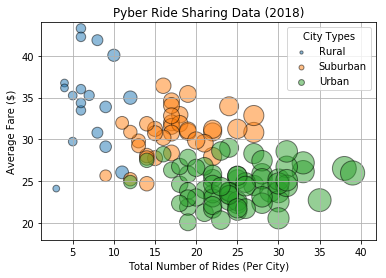

In [67]:
# Create new dataframe group just by type to plot
grouped = type_group.groupby('type')

fig, ax = plt.subplots()
for name, group in grouped:
    plt.scatter(group.rides, group.avg_fare, marker='o', s=group.rides*15, label=name, edgecolors="black", alpha=0.5)
    #ax.scatter(group.rides, group.avg_fare, marker='o', s=group.rides*20, label=name, alpha=0.5)

plt.grid(True)
plt.ylim(18,44)
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

lgnd = plt.legend(title='City Types', markerscale=0.3)

plt.show()

## Bubble Plot of Ride Sharing Data

In [ ]:
grouped.head()

In [ ]:
# Obtain the x and y coordinates for each of the three city types

count_chart = count_makers.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Car Manufacturer")
count_chart.set_ylabel("Number of Cars")


plt.show()

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()